# Self Organizing Map (SOM)

Implementation of a Self Organizing Map (SOM) using Python and the Numpy library.

In [1]:
import os
import pandas as pd
import numpy as np

# folder of csv files
data_folder = "data"

# Importing the dataset
# read all csv files in the folder
# and concatenate them into one dataframe
df = pd.DataFrame()
total_rows = 0
for file in os.listdir(data_folder):
    if file.endswith(".csv"):
        # print("Reading file: " + file)
        tmp_df = pd.read_csv(os.path.join(data_folder, file), header=None)
        # print("Shape of the dataframe: " + str(tmp_df.shape))
        total_rows += tmp_df.shape[0]
        df = pd.concat([df, tmp_df], ignore_index=True)

print("Total rows: " + str(total_rows))

# display the first 5 rows
display(df.head(5))

# show the last 5 rows
df.tail(5)


Total rows: 6465


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.018660,-0.064704,-0.056047,0.001813,-0.044006,-0.006070,0.003093,0.051007,0.040425,0.062141,...,-0.029983,0.002690,0.040127,0.033259,-0.064997,0.088038,0.075792,-0.033615,-0.024802,-0.086013
1,0.069593,0.063960,0.056530,0.013832,0.002506,-0.043326,-0.003272,-0.013916,-0.018599,0.082836,...,-0.024142,0.010394,0.030738,0.043227,-0.064303,-0.053329,0.057088,-0.061888,-0.062309,0.016592
2,0.073233,0.024593,-0.034057,0.030950,-0.074441,-0.024134,0.019169,0.035633,-0.010652,0.055354,...,0.029946,-0.034143,0.079221,-0.084193,0.040624,0.053495,0.000560,0.064311,-0.003033,-0.044930
3,0.069590,0.065502,0.048911,-0.039383,-0.021970,0.028375,0.018873,-0.016169,0.012417,0.084431,...,0.023459,0.070572,-0.039435,-0.038017,-0.033207,-0.024226,-0.026315,0.020421,0.000738,-0.013793
4,0.073752,0.054697,-0.015115,-0.030110,-0.014158,0.018822,-0.019967,-0.035178,-0.014646,0.038367,...,0.011964,0.041329,0.013161,-0.096665,0.004753,0.007955,0.054431,-0.056925,-0.033928,-0.012074


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
6460,0.007787,0.045963,0.029892,0.045340,0.000974,0.066521,-0.044026,-0.006711,0.008490,0.039022,...,0.013389,-0.030358,0.044750,-0.075466,0.054357,0.032533,0.040642,-0.005925,0.047630,-0.006704
6461,0.079454,0.011559,0.001518,-0.012414,0.017170,-0.010585,-0.066834,-0.028413,0.022650,0.046904,...,0.001387,0.026105,-0.000896,0.071035,-0.068899,0.091918,-0.024825,0.058493,-0.071288,-0.091906
6462,0.043266,0.019924,0.009011,0.008583,0.041845,0.051814,-0.048889,-0.025036,0.049338,-0.013992,...,-0.054278,0.019847,0.068944,-0.089092,0.010378,0.002485,0.007150,-0.074412,0.038306,-0.048570
6463,0.045189,-0.009232,0.014421,-0.044905,-0.065516,0.068863,-0.001215,-0.069571,0.073453,0.074257,...,0.037119,0.054549,0.016048,-0.060592,0.014308,-0.039012,-0.030921,0.000162,-0.067464,0.000100
6464,0.031378,-0.034581,-0.046084,0.050534,-0.005415,0.004696,0.033668,-0.040614,0.025769,0.070356,...,-0.010635,0.030889,0.086423,0.006590,0.011446,-0.047979,-0.010818,0.034069,-0.072624,0.006297


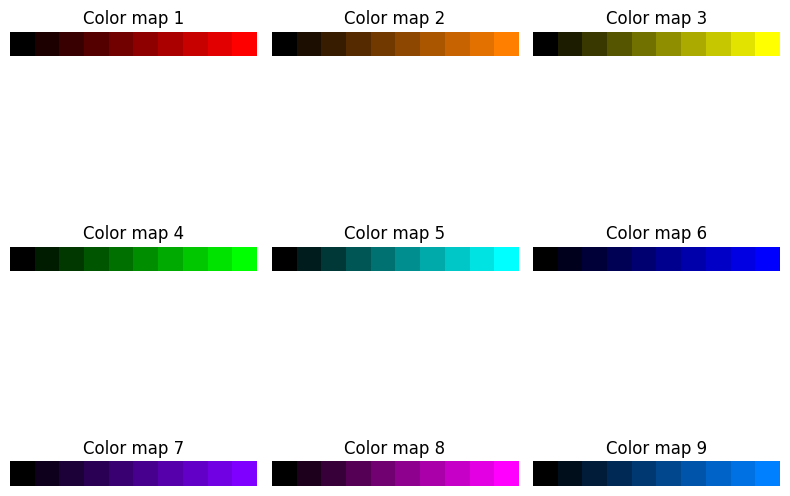

In [2]:
# we create 9 color maps for each class pf the data set

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the base colors (in RGB format)
base_colors = [(1.0, 0.0, 0.0),    # Red
               (1.0, 0.5, 0.0),    # Orange
               (1.0, 1.0, 0.0),    # Yellow
               (0.0, 1.0, 0.0),    # Green
               (0.0, 1.0, 1.0),    # Cyan
               (0.0, 0.0, 1.0),    # Blue
               (0.5, 0.0, 1.0),    # Purple
               (1.0, 0.0, 1.0),    # Magenta
               (0.0, 0.5, 1.0)]    # Light blue

# Define the number of colors in each colormap
n_colors = 256

# Initialize an empty list to store the color maps
cmaps = []

# Loop over the base colors and create a color map for each one
for base_color in base_colors:
    # make interpolation form black to the base color
    s_list = (np.linspace(0, base_color[0], n_colors), np.linspace(0, base_color[1], n_colors), np.linspace(0, base_color[2], n_colors))

    # Create a list of colors that linearly interpolates from black to the base color
    colors = [(s1, s2, s3) for s1, s2, s3 in zip(s_list[0], s_list[1], s_list[2])]
    
    # Create a custom color map with the colors
    cmap = ListedColormap(colors)

    # Add the color map to the list
    cmaps.append(cmap)

# Plot the color maps
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow([[i for i in range(10)]], cmap=cmaps[i])
    ax.set_title('Color map {}'.format(i+1))
    ax.axis('off')
plt.tight_layout()
plt.show()

### Train the model

In [3]:
# use the sklearn_som library to train the SOM with the 
# previously loaded dataset with 512 features, 9 classes
# and 6464 samples
import matplotlib.pyplot as plt
from sklearn_som.som import SOM

# set parameters
x_dim = 10
y_dim = 10
n_iterations = 10000000000
learning_rate = 0.1

# initialize the SOM
som = SOM(m=x_dim, n=y_dim, dim=df.shape[1], lr=learning_rate, max_iter=n_iterations) #, random_state=42)

# train the SOM with the dataset passed as a numpy array
som.fit(df.values, epochs=40)

# list of files
files = ['data/{}'.format(f) for f in os.listdir('data') if f.endswith('.csv')]

# list of dataframes
dfs = [pd.read_csv(f, sep=',', header=None) for f in files]

# list of predictions
predictions = [som.predict(df.values) for df in dfs]

### Visualize the results

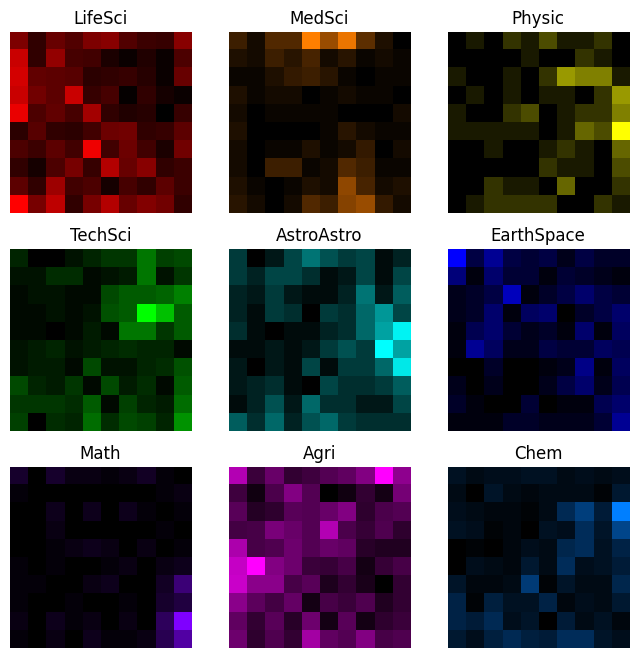

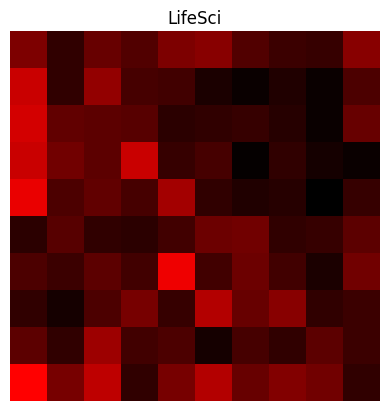

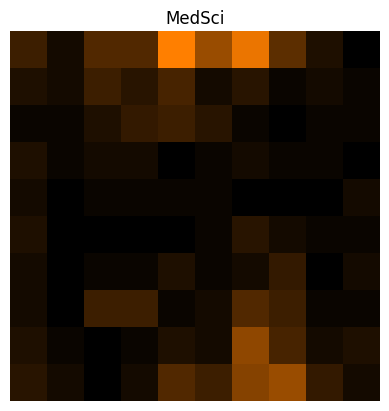

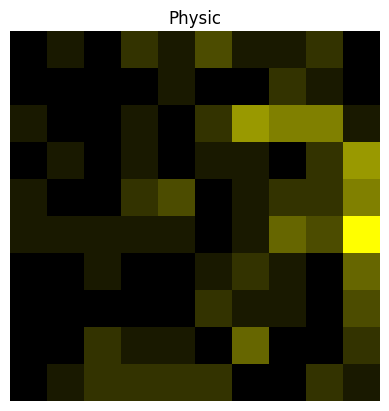

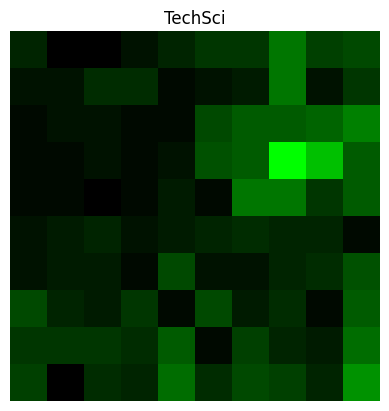

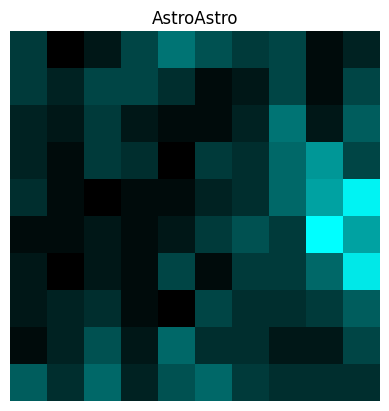

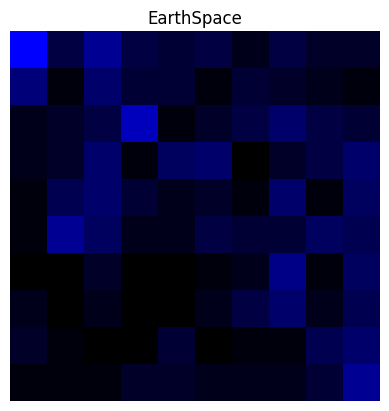

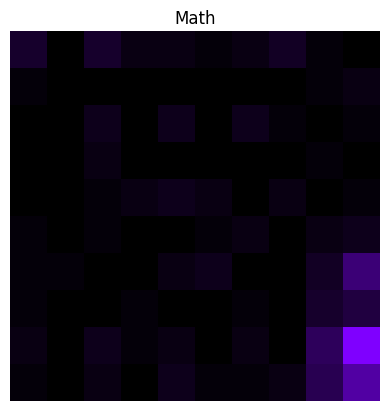

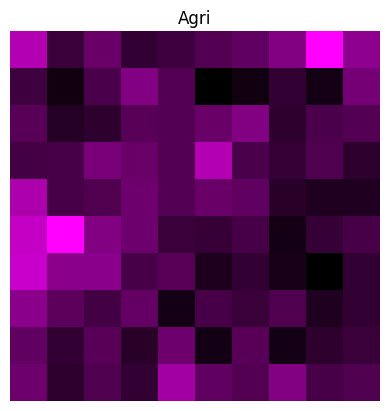

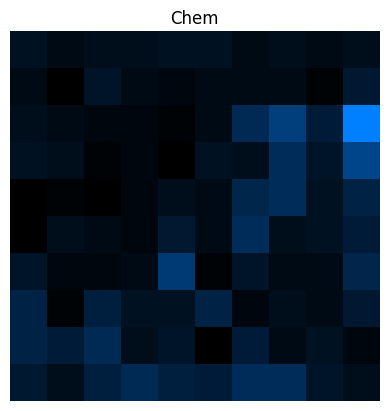

In [5]:
# make subplots for each class
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
i,j,k = 0,0,0

individual_plots = True

# %matplotlib inline

# plot the neurons as a grid of colors
for pred, cmap in zip(predictions, cmaps):
    data_plot_grid = np.zeros((x_dim, y_dim))
    # count occurrences of each unique value in the array
    unique, counts = np.unique(pred, return_counts=True)
    # fill the data plot grid with the i,j indices of the data predicted
    # to be in the neuron with the same i,j indices
    idx = np.unravel_index(unique, (x_dim, y_dim))
    data_plot_grid[idx] = counts

    # plot the data points
    axs[i,j].imshow(data_plot_grid, cmap=cmap)
    axs[i,j].set_title(files[k].split('/')[1].split('.')[0])
    axs[i,j].axis('off')
        
    j += 1
    if j % 3 == 0:
        j = 0
        i += 1
    k += 1

# show the plot
plt.show()

if individual_plots:
    k = 0
    # plot the neurons as a grid of colors
    for pred, cmap in zip(predictions, cmaps):
        data_plot_grid = np.zeros((x_dim, y_dim))
        # count occurrences of each unique value in the array
        unique, counts = np.unique(pred, return_counts=True)
        # fill the data plot grid with the i,j indices of the data predicted
        # to be in the neuron with the same i,j indices
        idx = np.unravel_index(unique, (x_dim, y_dim))
        data_plot_grid[idx] = counts

        # plot the data points
        plt.imshow(data_plot_grid, cmap=cmap)
        plt.title(files[k].split('/')[1].split('.')[0])
        plt.axis('off')
        # show the plot
        plt.show()

        k += 1